In [1]:
# install kaggle library

!pip install kaggle

In [2]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Import the dog vs cat dataset from Kaggle

In [3]:
# kaggle api
!kaggle competitions download -c dogs-vs-cats

100% 812M/812M [00:33<00:00, 28.6MB/s]
100% 812M/812M [00:33<00:00, 25.4MB/s]


In [4]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done..')
  print('The dataset is extracted')

Done..
The dataset is extracted


In [6]:
# Extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done..')
  print('The dataset is extracted')

Done..
The dataset is extracted


In [7]:
# Counting the number of files in the train folder
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images:', file_count)

Number of images: 25000


In [8]:
# Printing the name of images
file_names = os.listdir('/content/train')
print(file_names)

['dog.3325.jpg', 'dog.1242.jpg', 'cat.2360.jpg', 'cat.3058.jpg', 'dog.4162.jpg', 'cat.7101.jpg', 'dog.3183.jpg', 'dog.7261.jpg', 'dog.11287.jpg', 'cat.8205.jpg', 'cat.74.jpg', 'cat.3214.jpg', 'cat.4491.jpg', 'dog.2577.jpg', 'dog.960.jpg', 'dog.7775.jpg', 'cat.779.jpg', 'cat.7525.jpg', 'dog.1236.jpg', 'cat.10885.jpg', 'dog.4154.jpg', 'dog.9701.jpg', 'dog.3667.jpg', 'dog.6803.jpg', 'cat.7996.jpg', 'cat.104.jpg', 'cat.10146.jpg', 'dog.7601.jpg', 'dog.8709.jpg', 'cat.4145.jpg', 'dog.1894.jpg', 'cat.8238.jpg', 'cat.4427.jpg', 'cat.10838.jpg', 'dog.4076.jpg', 'dog.9588.jpg', 'cat.10900.jpg', 'dog.1247.jpg', 'cat.11294.jpg', 'cat.8165.jpg', 'cat.7898.jpg', 'dog.8664.jpg', 'dog.10560.jpg', 'cat.8422.jpg', 'dog.3857.jpg', 'cat.6365.jpg', 'dog.11397.jpg', 'dog.3080.jpg', 'cat.6367.jpg', 'dog.2619.jpg', 'cat.2689.jpg', 'dog.6388.jpg', 'cat.3532.jpg', 'dog.1099.jpg', 'dog.941.jpg', 'dog.11563.jpg', 'dog.7041.jpg', 'dog.50.jpg', 'dog.6440.jpg', 'cat.10443.jpg', 'cat.9736.jpg', 'dog.4760.jpg', 'cat.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow # for displaying the image

Displaying the images of dogs and cats

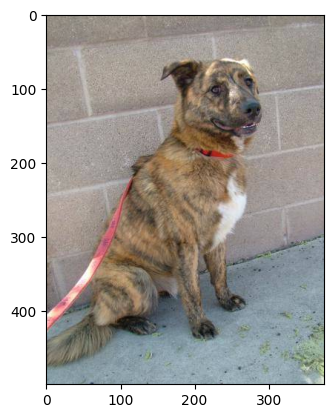

In [10]:
# Let's display a dog image
img = mpimg.imread('/content/train/dog.1242.jpg')
imgplt = plt.imshow(img)
plt.show()

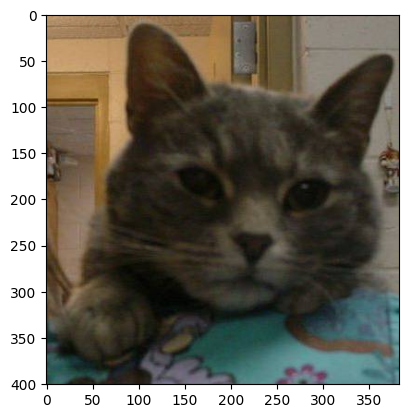

In [11]:
# Display a cat image
img = mpimg.imread('/content/train/cat.2360.jpg')
imgplt = plt.imshow(img)
plt.show()

In [12]:
file_names = os.listdir('/content/train')

for i in range(5):
  print(file_names[i])

dog.3325.jpg
dog.1242.jpg
cat.2360.jpg
cat.3058.jpg
dog.4162.jpg


In [13]:
for i in range(5):
  name = file_names[i]
  print(name[0:3])

dog
dog
cat
cat
dog


In [14]:
dog_count = 0
cat_count = 0

In [15]:
for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count+=1
  else:
    cat_count+=1
print("The number of dog images:", dog_count)
print("The number of cat images:", cat_count)

The number of dog images: 12500
The number of cat images: 12500


Resizing all the images

In [16]:
# Let's create a directory for resized images
os.mkdir('/content/image resized')

In [17]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000): # here we just apply for only 2000 images not all of them (25000)
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

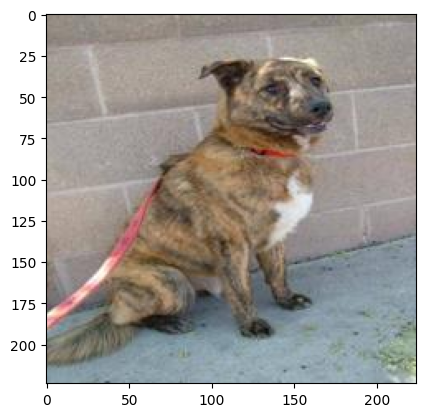

In [18]:
# Display a resized dog image
img = mpimg.imread('/content/image resized/dog.1242.jpg')
imgplt = plt.imshow(img)
plt.show()

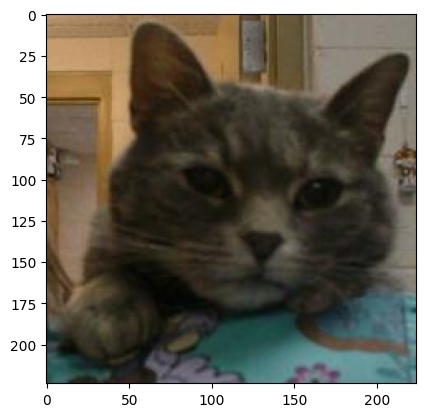

In [19]:
# Display a resized cat image
img = mpimg.imread('/content/image resized/cat.2360.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating Labels**
- Cat -> 0
- Dog -> 1

In [20]:
# Creating a for loop to assign the labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [21]:
print(filenames[0:7])
print(len(filenames))

['dog.3325.jpg', 'dog.1242.jpg', 'cat.2360.jpg', 'cat.3058.jpg', 'dog.4162.jpg', 'cat.7101.jpg', 'dog.3183.jpg']
2000


In [22]:
print(labels[0:7])
print(len(labels))

[1, 1, 0, 0, 1, 0, 1]
2000


In [23]:
# Counting the number of images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 974 1026]


Converting all the resized images to numpy arrays

In [24]:
import cv2
import glob

In [25]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files]) #cv2.imread is for making numpy array. This line converts each image file into a NumPy array

In [26]:
print(dog_cat_images)

[[[[139 142 147]
   [140 143 148]
   [138 141 146]
   ...
   [164 163 179]
   [162 162 178]
   [161 161 177]]

  [[139 142 147]
   [140 143 148]
   [138 141 146]
   ...
   [176 175 191]
   [173 172 188]
   [171 171 187]]

  [[139 142 147]
   [141 144 149]
   [140 143 148]
   ...
   [180 177 193]
   [177 174 190]
   [173 172 188]]

  ...

  [[138 141 146]
   [139 142 147]
   [157 160 165]
   ...
   [ 84  86  94]
   [ 87  89  97]
   [ 85  87  95]]

  [[105 108 113]
   [112 115 120]
   [142 145 150]
   ...
   [ 78  81  89]
   [ 84  87  95]
   [ 85  88  96]]

  [[ 94  97 102]
   [108 111 116]
   [149 152 157]
   ...
   [ 73  76  84]
   [ 82  85  93]
   [ 86  89  97]]]


 [[[125 134 143]
   [124 133 142]
   [123 132 141]
   ...
   [123 134 138]
   [121 132 136]
   [119 130 134]]

  [[136 145 154]
   [131 140 149]
   [126 135 144]
   ...
   [127 138 142]
   [126 135 139]
   [121 132 136]]

  [[139 148 157]
   [132 141 150]
   [126 135 144]
   ...
   [123 132 136]
   [121 127 132]
   [116 125

In [27]:
type(dog_cat_images)

numpy.ndarray

In [29]:
print(dog_cat_images.shape) # 2000 224x224 RGB images

(2000, 224, 224, 3)


In [30]:
X = dog_cat_images
y = np.asarray(labels)

**Train Test Split**

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

1600 training images and 400 test images

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [33]:
print(y.shape, y_train.shape, y_test.shape)

(2000,) (1600,) (400,)


**Scaling the Data**

Neural networks perform better when the input features are on a similar scale. This is why normalization (scaling) is applied.
By dividing the pixel values by 255, we are normalizing the pixel values to a range between 0 and 1.
0 becomes 0.0.
255 becomes 1.0.
Other values are scaled proportionally (e.g., 128 becomes 0.5).

Image formats (like PNG or JPG), the pixel values are stored as integers ranging from 0 to 255.
0 represents black.
255 represents white.
Values in between represent different shades of gray or the intensity of a color channel (Red, Green, or Blue).

In [35]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [36]:
print(X_train_scaled)

[[[[0.4        0.39215686 0.39215686]
   [0.38039216 0.37254902 0.37254902]
   [0.36862745 0.36078431 0.36078431]
   ...
   [0.98823529 0.98823529 0.98823529]
   [0.98823529 0.98823529 0.98823529]
   [0.98823529 0.98823529 0.98823529]]

  [[0.42745098 0.41960784 0.41960784]
   [0.40784314 0.4        0.4       ]
   [0.39607843 0.38823529 0.38823529]
   ...
   [0.98823529 0.98823529 0.98823529]
   [0.98823529 0.98823529 0.98823529]
   [0.98823529 0.98823529 0.98823529]]

  [[0.45098039 0.44313725 0.44313725]
   [0.43137255 0.42352941 0.42352941]
   [0.42352941 0.41568627 0.41568627]
   ...
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]
   [0.99215686 0.99215686 0.99215686]]

  ...

  [[0.16862745 0.48627451 0.59215686]
   [0.17647059 0.49411765 0.6       ]
   [0.18823529 0.50588235 0.61176471]
   ...
   [0.69411765 0.69019608 0.6745098 ]
   [0.67058824 0.6745098  0.65882353]
   [0.65490196 0.65882353 0.64313725]]

  [[0.16078431 0.47843137 0.58431373]
   [0.1

**Building the Neural Network**

In [37]:
import tensorflow as tf
import tensorflow_hub as hub # TensorFlow Hub allows us to easily access pre-trained models and components that can be used for tasks such as image classification, text embedding, object detection, and more.

In [38]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False) # Only the new classification layer is trained, which is why we set trainable=False for the pre-trained model. This significantly reduces the amount of data and time required for training.

In [50]:
print(tf.__version__)
print(hub.__version__)


2.17.0
0.16.1


The Lambda layer allows us to use any function as a layer in a model. Here, we wrap the pretrained_model (the pre-trained model) function inside a Lambda layer and apply it to the inputs variable. This ensures that the KerasLayer properly processes the inputs and allows the TensorFlow Hub layer to work seamlessly with symbolic tensors.

In [52]:
from tensorflow.keras.layers import Lambda

# Define the Functional model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = Lambda(lambda inputs: pretrained_model(inputs))(inputs)  # Wrap KerasLayer with Lambda
outputs = tf.keras.layers.Dense(2, activation='softmax')(x) # 2 classes dog and cat

model = tf.keras.Model(inputs, outputs)

# Print the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

We're not retraining the entire pre-trained model. Instead, we're adding a new layer on top of the pre-trained model, which acts as the final classification layer for our specific task (e.g., dogs vs. cats).

In [53]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc'] # Accuracy score
)

In [54]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - acc: 0.8073 - loss: 0.3955
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - acc: 0.9694 - loss: 0.0913
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - acc: 0.9760 - loss: 0.0702
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - acc: 0.9827 - loss: 0.0502
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - acc: 0.9872 - loss: 0.0441


In [55]:
score, acc = model.evaluate(X_test_scaled, y_test) # Model predicts for X_test_scaled
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - acc: 0.9861 - loss: 0.0490
Test Loss = 0.06976145505905151
Test Accuracy = 0.9750000238418579


**Building a Predictive System**

Path of the image to be predicted: /content/Thinking-of-getting-a-cat.png


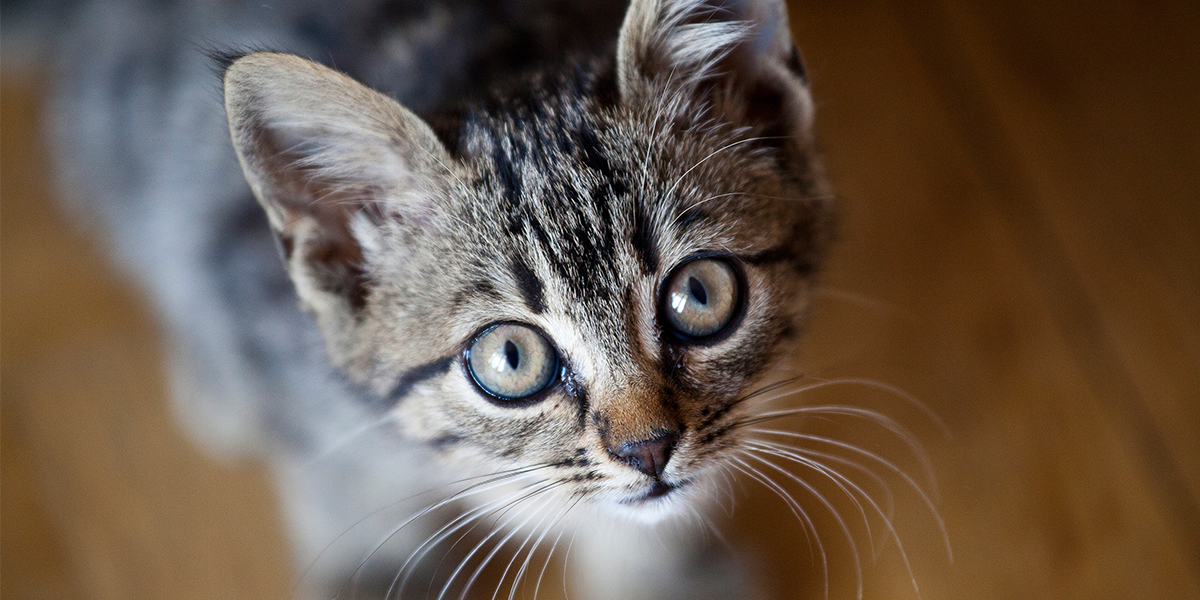

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step
[[0.9985341  0.00146595]]
0
Cat


In [56]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3]) # For one 224x224 RGB image. We're saying to the model that we are predicting for only one image here

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('Cat')

else:
  print('Dog')

Path of the image to be predicted: /content/images.jpg


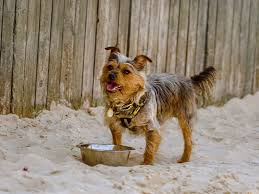

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
[[0.0710621  0.92893785]]
1
Dog


In [57]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3]) # For one 224x224 RGB image

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('Cat')

else:
  print('Dog')